# Assignment 05

## Downloading and importing requiered libraries and datasets

In [2]:
!pip install numpy
!pip install tensorflow
!pip instal matplotib
!pip install sklearn
!pip install pandas

ERROR: unknown command "instal" - maybe you meant "install"


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib as plt
import pandas as pd

In [4]:
tf.random.set_seed(42) #setting seed to 42 to maintain the same shuffle output

## Data intialization & prepairing

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #getting fashion mnist data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1) # reshaping data 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1) # reshaping data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) 

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [6]:
y_train_oh, y_test_oh = tf.one_hot(y_train, depth = len(set(y_train))), tf.one_hot(y_test, depth = len(set(y_test))) #one hot target data
y_train_oh, y_test_oh

(<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

### Create data bathces

In [7]:
def data_creator(x, y, batch_size = 32): #Creating batches data set
  data = tf.data.Dataset.from_tensor_slices((x, y))
  data = data.shuffle(28*28)
  data = data.batch(batch_size)
  data = data.prefetch(tf.data.experimental.AUTOTUNE)
  return data

In [8]:
train_data = data_creator(x_train, y_train)
test_data = data_creator(x_test, y_test)
train_data, test_data

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.uint8)>)

## Creating DNN Model

In [78]:
DNN = tf.keras.models.Sequential([
                                    tf.keras.layers.Input((28,28,1)),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [79]:
DNN.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 28, 28, 64)        128       
_________________________________________________________________
dense_77 (Dense)             (None, 28, 28, 128)       8320      
_________________________________________________________________
flatten_12 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 100352)            0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1003530   
Total params: 1,011,978
Trainable params: 1,011,978
Non-trainable params: 0
_________________________________________________________________


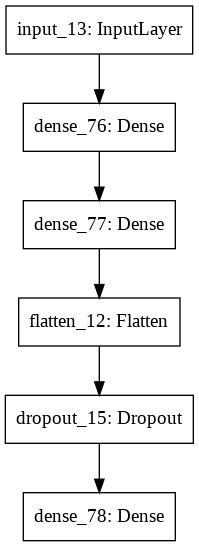

In [80]:
tf.keras.utils.plot_model(DNN)

In [81]:
DNN.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.CategoricalCrossentropy(), metrics = tf.metrics.CategoricalAccuracy())

In [82]:
DNN.fit(x_train, y_train_oh, epochs = 16, validation_data = (x_test, y_test_oh))

Epoch 1/16
1875/1875 [==============================] - 10s 5ms/step - loss: 5.4857 - categorical_accuracy: 0.7718 - val_loss: 0.4456 - val_categorical_accuracy: 0.8373
Epoch 2/16
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3922 - categorical_accuracy: 0.8566 - val_loss: 0.4811 - val_categorical_accuracy: 0.8314
Epoch 3/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3958 - categorical_accuracy: 0.8558 - val_loss: 0.4577 - val_categorical_accuracy: 0.8279
Epoch 4/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3884 - categorical_accuracy: 0.8601 - val_loss: 0.4267 - val_categorical_accuracy: 0.8467
Epoch 5/16
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3721 - categorical_accuracy: 0.8632 - val_loss: 0.4109 - val_categorical_accuracy: 0.8520
Epoch 6/16
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3649 - categorical_accuracy: 0.8645 - val_loss: 0.4353 - val_categorical_accur

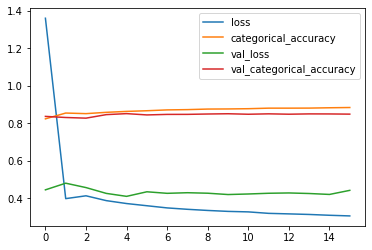

In [83]:
DNN_df=pd.DataFrame(DNN.history.history)
DNN_df.plot.line()

## Creating CNN Model

In [68]:
CNN = tf.keras.models.Sequential([
                                    tf.keras.layers.Input((28,28,1)),
                                    tf.keras.layers.Conv2D(32, 1, activation='relu',padding='same'),
                                    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1, l2=2)),
                                    tf.keras.layers.Conv2D(64, 3, activation='relu',padding='same'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    tf.keras.layers.Conv2D(128, 5, activation='relu',padding='same'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Conv2D(64, 3, activation='relu',padding='same'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.MaxPooling2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [69]:
DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 64)        128       
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                501770    
Total params: 501,898
Trainable params: 501,898
Non-trainable params: 0
_________________________________________________________________


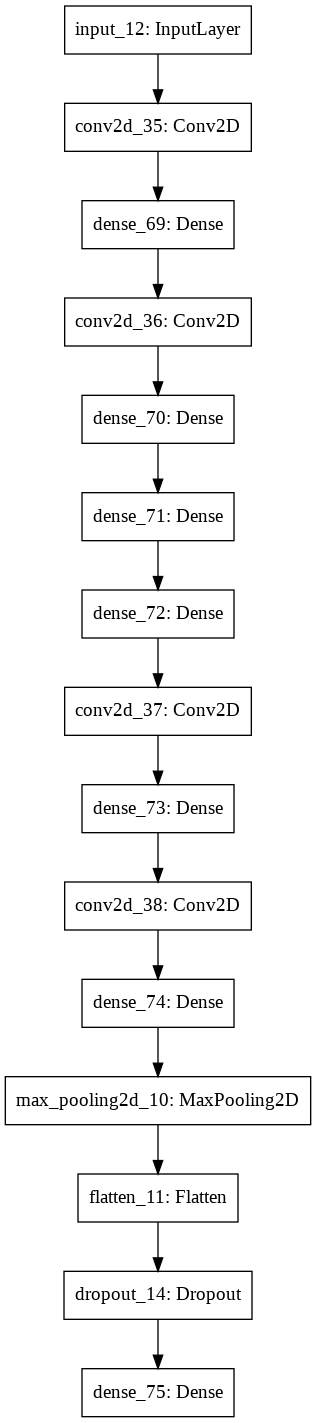

In [70]:
tf.keras.utils.plot_model(CNN)

In [71]:
CNN.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.CategoricalCrossentropy(), metrics = tf.metrics.CategoricalAccuracy())

In [72]:
CNN.fit(x_train, y_train_oh, epochs = 32, validation_data = (x_test, y_test_oh))

Epoch 1/32
1875/1875 [==============================] - 32s 17ms/step - loss: 60.5845 - categorical_accuracy: 0.7986 - val_loss: 0.6629 - val_categorical_accuracy: 0.8900
Epoch 2/32
1875/1875 [==============================] - 31s 17ms/step - loss: 0.6723 - categorical_accuracy: 0.9007 - val_loss: 0.7050 - val_categorical_accuracy: 0.8925
Epoch 3/32
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6151 - categorical_accuracy: 0.9153 - val_loss: 0.6764 - val_categorical_accuracy: 0.8958
Epoch 4/32
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5949 - categorical_accuracy: 0.9264 - val_loss: 0.5867 - val_categorical_accuracy: 0.9102
Epoch 5/32
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5098 - categorical_accuracy: 0.9335 - val_loss: 0.6168 - val_categorical_accuracy: 0.9165
Epoch 6/32
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4935 - categorical_accuracy: 0.9423 - val_loss: 0.5872 - val_categori

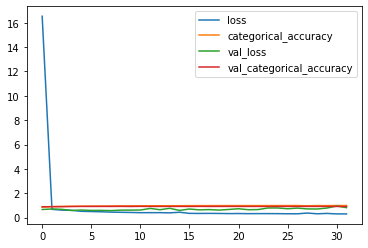

In [73]:
CNN_df=pd.DataFrame(CNN.history.history)
CNN_df.plot.line()